In [1]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import scipy
import sklearn
import os
import chardet

# matplotlib 하위 모듈
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# matplotlib 폰트 설정
plt.rcParams['font.size'] = 17.5
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.sans-serif'] = ['Malgun Gothic']

# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 옵션 설정
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

# 버전 체크
# print(pd.__version__)          # 2.1.1
# print(np.__version__)          # 1.26.1
# print(sns.__version__)         # 0.13.0
# print(matplotlib.__version__)  # 3.8.0
# print(scipy.__version__)       # 1.11.3
# print(sklearn.__version__)     # 1.3.1
# print(chardet.__version__)     # 5.2.0

In [2]:
# Edit_data.csv의 감지된 인코딩은: EUC-KR 입니다.
# Edit_quality.csv의 감지된 인코딩은: UTF-8-SIG 입니다.
# Edit_train.csv의 감지된 인코딩은: UTF-8-SIG 입니다.

# 데이터 불러오기
path = './data/'

Data = pd.read_csv(path + 'data_mean.csv', encoding='utf-8')  # A_01 부터 체크
A_01 = Data.copy()

Quality = pd.read_excel(path + 'quality.xlsx') # B_01 부터 체크
B_01 = Quality.copy()

# Train = pd.read_csv(path + 'Edit_train.csv', encoding='utf-8-sig') # C_01 부터 체크
# C_01 = Train.copy()

### 스탠다드 스케일러를 이용한 모델 평가

In [3]:
Stand_A_01_01 = A_01.copy()
Stand_A_01_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939722 entries, 0 to 2939721
Data columns (total 20 columns):
 #   Column     Dtype  
---  ------     -----  
 0   TAG_MIN    object 
 1   AN         int64  
 2   DZ1_OP     float64
 3   DZ2_OP     float64
 4   DZ1_TEMP   float64
 5   DZ2_TEMP   float64
 6   CLEAN      float64
 7   HDZ1_OP    float64
 8   HDZ2_OP    float64
 9   HDZ3_OP    float64
 10  HDZ4_OP    float64
 11  HDZ_CP     float64
 12  HDZ1_TEMP  float64
 13  HDZ2_TEMP  float64
 14  HDZ3_TEMP  float64
 15  HDZ4_TEMP  float64
 16  SCZ1_TEMP  float64
 17  SCZ2_TEMP  float64
 18  STZ1_TEMP  float64
 19  STZ2_TEMP  float64
dtypes: float64(18), int64(1), object(1)
memory usage: 448.6+ MB


In [4]:
# HDZ_CPM: 소입로 CP 모니터 값 0으로 채워져있음
Stand_A_01_01.describe()

,AN,DZ1_OP,DZ2_OP,DZ1_TEMP,DZ2_TEMP,CLEAN,HDZ1_OP,HDZ2_OP,HDZ3_OP,HDZ4_OP,HDZ_CP,HDZ1_TEMP,HDZ2_TEMP,HDZ3_TEMP,HDZ4_TEMP,SCZ1_TEMP,SCZ2_TEMP,STZ1_TEMP,STZ2_TEMP
count,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000,2939722.0000
mean,128442.2464,69.8940,20.4471,100.0061,100.0198,67.7186,75.6437,54.8624,53.8603,71.0893,0.4489,859.2077,860.0021,860.0029,860.0062,283.9963,279.9293,331.8062,332.1773
std,12637.0445,4.0148,5.2171,0.4360,0.3623,1.6307,25.1425,4.4291,2.6643,2.5570,0.0189,3.6476,0.5578,0.3518,0.4552,9.5126,6.6114,0.7827,0.8733
min,102410.0000,47.2532,0.0001,97.3421,97.8706,60.6244,0.0009,8.6200,0.0437,0.0062,0.0051,840.2980,855.9290,858.2800,857.9920,266.2300,266.4260,328.1610,328.0730
25%,119448.0000,68.4288,18.9176,99.8145,99.8901,66.5695,65.0094,53.3259,52.3891,69.6781,0.4484,857.9490,859.7760,859.8290,859.8430,274.7540,273.5030,331.8670,332.1780
50%,129889.0000,70.5166,21.2931,100.0020,100.0190,67.6974,82.1768,55.6654,53.8862,71.0454,0.4501,859.5740,860.0220,860.0020,860.0000,284.5850,280.0190,332.0170,332.4230
75%,139116.0000,72.3781,23.3884,100.1910,100.1610,68.9798,95.3422,57.5733,55.4145,72.4771,0.4517,860.2580,860.2490,860.1720,860.1580,293.3430,286.3340,332.1410,332.6260
max,148069.0000,87.2995,47.5395,102.4690,101.8430,71.4901,100.0000,77.2709,66.0150,87.3907,0.9091,877.2280,866.0340,870.1190,882.1480,298.5300,291.6960,332.7170,333.1790


In [5]:
# HDZ_CPM: mean, std, min, 25%, 50%, 75%, max == 0 이므로 무의미한 컬럼이므로 삭제하도록 함
# Stand_A_01_02 = Stand_A_01_01.drop(['HDZ_CPM'], axis=1)
# Stand_A_01_02.head(1)
Stand_A_01_02 = Stand_A_01_01.copy()
Stand_A_01_02.drop(['TAG_MIN'], axis=1, inplace=True)

In [6]:
# AN(배정번호) 정수값으로 변환
Stand_A_01_03 = Stand_A_01_02.copy()
Stand_A_01_03['AN'].astype('int')

0          102410
1          102410
2          102410
3          102410
4          102410
            ...  
2939717    148069
2939718    148069
2939719    148069
2939720    148069
2939721    148069
Name: AN, Length: 2939722, dtype: int64

In [7]:
# 결측치 체크
Stand_A_01_03.isna().sum()

AN           0
DZ1_OP       0
DZ2_OP       0
DZ1_TEMP     0
DZ2_TEMP     0
CLEAN        0
HDZ1_OP      0
HDZ2_OP      0
HDZ3_OP      0
HDZ4_OP      0
HDZ_CP       0
HDZ1_TEMP    0
HDZ2_TEMP    0
HDZ3_TEMP    0
HDZ4_TEMP    0
SCZ1_TEMP    0
SCZ2_TEMP    0
STZ1_TEMP    0
STZ2_TEMP    0
dtype: int64

### 02. Merge전 전처리

In [8]:
Stand_A_02_01 = Stand_A_01_03.groupby(['AN']).agg(['mean', 'std'])
Stand_A_02_01.head()

DZ1_OP         DZ2_OP        DZ1_TEMP        DZ2_TEMP          CLEAN  \
          mean    std    mean    std     mean    std     mean    std    mean   
AN                                                                             
102410 72.2527 3.6965 21.3545 4.3489  99.9435 0.5939 100.0619 0.4835 69.6026   
102585 72.2356 3.3650 18.6026 2.8597  99.9874 0.5154 100.0650 0.3561 69.5912   
102930 70.7202 3.2318 20.9119 2.5821  99.9956 0.4727 100.0216 0.3430 69.5295   
103142 72.4242 2.6352 22.2502 2.4028 100.0051 0.3314 100.0097 0.2518 69.5369   
103675 72.7746 4.1592 21.8652 3.6228  99.9835 0.6553 100.0437 0.4707 69.3210   

              HDZ1_OP         HDZ2_OP        HDZ3_OP        HDZ4_OP         \
          std    mean     std    mean    std    mean    std    mean    std   
AN                                                                           
102410 0.8454 75.7122 22.9797 59.3326 1.7839 50.6809 1.4400 70.2494 2.5042   
102585 1.0642 74.8979 23.4053 59.1689 1.9203 52.0143 1.4977 70.6397 2.2398   
102930 1.0979 70.7003 23.6703 45.8490 2.1012 48.2632 1.4201 67.1299 2.1310   
103142 1.0643 77.3254 15.4611 46.0317 1.5804 50.5714 1.2435 69.4428 1.7862   
103675 0.9917 74.7738 23.5540 45.1690 1.5090 50.2557 1.7672 69.7685 2.7004   

       HDZ_CP        HDZ1_TEMP        HDZ2_TEMP        HDZ3_TEMP         \
         mean    std      mean    std      mean    std      mean    std   
AN                                                                        
102410 0.4505 0.0059  859.4869 3.5738  860.0124 0.4007  860.0098 0.2816   
102585 0.4502 0.0028  859.3333 3.0190  860.0086 0.4035  859.9898 0.2411   
102930 0.4493 0.0059  859.6424 2.8268  859.9879 0.3844  859.9960 0.2419   
103142 0.4498 0.0040  859.8549 1.5416  859.9955 0.2466  859.9969 0.1886   
103675 0.4500 0.0030  859.8177 3.6836  859.9567 0.2956  860.0242 0.3190   

       HDZ4_TEMP        SCZ1_TEMP        SCZ2_TEMP        STZ1_TEMP         \
            mean    std      mean    std      mean    std      mean    std   
AN                                                                           
102410  860.0106 0.5534  282.5815 9.3711  280.1490 6.0339  329.0163 0.1270   
102585  859.9918 0.4805  282.7882 9.4996  279.7723 7.1615  328.9986 0.1012   
102930  860.0075 0.4184  283.3309 9.6804  279.3090 6.6652  329.1336 0.1212   
103142  860.0035 0.2967  282.8823 9.4955  279.2411 6.5374  329.0821 0.1000   
103675  860.0072 0.5712  283.5816 9.7056  277.5448 5.3659  329.0109 0.0967   

       STZ2_TEMP         
            mean    std  
AN                       
102410  329.0709 0.1220  
102585  328.9242 0.0891  
102930  329.1488 0.1170  
103142  329.0732 0.1020  
103675  329.1145 0.0879

In [9]:
chg_name = {'mean':'_AVG', 'std': '_Std'}
Stand_A_02_01.columns = list(map(lambda x: x[0] + chg_name[x[1]], Stand_A_02_01.columns))

Stand_A_02_01.reset_index(drop=False, inplace=True)

In [10]:
Stand_A_02_01.head(1)

,AN,DZ1_OP_AVG,DZ1_OP_Std,DZ2_OP_AVG,DZ2_OP_Std,DZ1_TEMP_AVG,DZ1_TEMP_Std,DZ2_TEMP_AVG,DZ2_TEMP_Std,CLEAN_AVG,CLEAN_Std,HDZ1_OP_AVG,HDZ1_OP_Std,HDZ2_OP_AVG,HDZ2_OP_Std,HDZ3_OP_AVG,HDZ3_OP_Std,HDZ4_OP_AVG,HDZ4_OP_Std,HDZ_CP_AVG,HDZ_CP_Std,HDZ1_TEMP_AVG,HDZ1_TEMP_Std,HDZ2_TEMP_AVG,HDZ2_TEMP_Std,HDZ3_TEMP_AVG,HDZ3_TEMP_Std,HDZ4_TEMP_AVG,HDZ4_TEMP_Std,SCZ1_TEMP_AVG,SCZ1_TEMP_Std,SCZ2_TEMP_AVG,SCZ2_TEMP_Std,STZ1_TEMP_AVG,STZ1_TEMP_Std,STZ2_TEMP_AVG,STZ2_TEMP_Std
0,102410,72.2527,3.6965,21.3545,4.3489,99.9435,0.5939,100.0619,0.4835,69.6026,0.8454,75.7122,22.9797,59.3326,1.7839,50.6809,1.4400,70.2494,2.5042,0.4505,0.0059,859.4869,3.5738,860.0124,0.4007,860.0098,0.2816,860.0106,0.5534,282.5815,9.3711,280.1490,6.0339,329.0163,0.1270,329.0709,0.1220


In [11]:
Stand_A_02_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AN             136 non-null    int64  
 1   DZ1_OP_AVG     136 non-null    float64
 2   DZ1_OP_Std     136 non-null    float64
 3   DZ2_OP_AVG     136 non-null    float64
 4   DZ2_OP_Std     136 non-null    float64
 5   DZ1_TEMP_AVG   136 non-null    float64
 6   DZ1_TEMP_Std   136 non-null    float64
 7   DZ2_TEMP_AVG   136 non-null    float64
 8   DZ2_TEMP_Std   136 non-null    float64
 9   CLEAN_AVG      136 non-null    float64
 10  CLEAN_Std      136 non-null    float64
 11  HDZ1_OP_AVG    136 non-null    float64
 12  HDZ1_OP_Std    136 non-null    float64
 13  HDZ2_OP_AVG    136 non-null    float64
 14  HDZ2_OP_Std    136 non-null    float64
 15  HDZ3_OP_AVG    136 non-null    float64
 16  HDZ3_OP_Std    136 non-null    float64
 17  HDZ4_OP_AVG    136 non-null    float64
 18  HDZ4_OP_St

In [12]:
Stand_A_02_01.describe()

,AN,DZ1_OP_AVG,DZ1_OP_Std,DZ2_OP_AVG,DZ2_OP_Std,DZ1_TEMP_AVG,DZ1_TEMP_Std,DZ2_TEMP_AVG,DZ2_TEMP_Std,CLEAN_AVG,CLEAN_Std,HDZ1_OP_AVG,HDZ1_OP_Std,HDZ2_OP_AVG,HDZ2_OP_Std,HDZ3_OP_AVG,HDZ3_OP_Std,HDZ4_OP_AVG,HDZ4_OP_Std,HDZ_CP_AVG,HDZ_CP_Std,HDZ1_TEMP_AVG,HDZ1_TEMP_Std,HDZ2_TEMP_AVG,HDZ2_TEMP_Std,HDZ3_TEMP_AVG,HDZ3_TEMP_Std,HDZ4_TEMP_AVG,HDZ4_TEMP_Std,SCZ1_TEMP_AVG,SCZ1_TEMP_Std,SCZ2_TEMP_AVG,SCZ2_TEMP_Std,STZ1_TEMP_AVG,STZ1_TEMP_Std,STZ2_TEMP_AVG,STZ2_TEMP_Std
count,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000
mean,128897.1912,69.9161,3.4442,20.7351,3.3756,100.0046,0.4568,100.0135,0.3719,67.7910,0.6141,75.3717,24.7103,55.0219,2.7603,53.9568,1.8428,71.0287,1.8287,0.4479,0.0076,859.1973,3.6437,860.0031,0.5663,860.0051,0.3462,860.0074,0.3540,284.0018,9.4269,280.0161,6.5432,331.7992,0.1358,332.1629,0.1571
std,12403.3939,1.9839,0.6989,3.6314,0.9315,0.0620,0.1145,0.1091,0.1079,1.5089,0.3317,6.3654,5.1960,3.3286,0.8542,1.7844,0.7529,1.4340,1.0587,0.0130,0.0178,0.6014,1.3147,0.0259,0.1797,0.0365,0.1207,0.0659,0.2738,0.7635,0.7131,0.8777,0.5733,0.7910,0.0577,0.8774,0.0882
min,102410.0000,62.9142,1.4303,4.3665,1.3248,99.3702,0.0786,98.8638,0.0464,64.6216,0.0566,51.4322,2.5605,43.3118,0.9948,47.3185,0.9472,66.4568,0.9160,0.3411,0.0013,856.5440,0.0971,859.8996,0.1591,859.9213,0.1208,859.9477,0.0739,280.9212,1.4632,277.5448,1.0366,328.8319,0.0507,328.9242,0.0370
25%,120467.7500,68.9546,2.9770,19.4396,2.6984,99.9957,0.3819,99.9990,0.2865,66.5691,0.3927,73.3242,22.1210,54.3702,2.2204,53.2812,1.5798,70.1344,1.6037,0.4500,0.0029,858.8570,2.7201,859.9934,0.4257,859.9940,0.2698,859.9954,0.2923,283.5871,9.3505,279.6242,6.3677,331.9165,0.1012,332.1647,0.1017
50%,130199.0000,69.8206,3.4286,21.2772,3.2869,100.0026,0.4446,100.0116,0.3697,67.8474,0.5080,76.1939,24.7874,55.6828,2.7285,54.1461,1.7665,71.0535,1.7271,0.4501,0.0036,859.1656,3.6369,860.0016,0.5631,860.0000,0.3356,860.0012,0.3213,283.9833,9.5168,279.9868,6.6321,332.0135,0.1204,332.3941,0.1251
75%,138982.5000,70.8809,3.8673,22.7144,3.8283,100.0167,0.5213,100.0367,0.4444,69.2262,0.7515,79.2494,27.6350,56.8676,3.2574,54.8648,1.9540,71.9600,1.9133,0.4502,0.0046,859.5508,4.5717,860.0107,0.6936,860.0057,0.3961,860.0064,0.3730,284.6139,9.6015,280.3895,6.8198,332.1073,0.1458,332.5807,0.1842
max,148069.0000,74.4650,5.1421,31.3446,7.3669,100.1587,0.7584,100.2491,0.7515,70.1284,2.0272,94.0966,40.1163,59.3326,9.0297,57.8983,9.8082,74.3967,13.6354,0.4532,0.1438,860.8725,7.4406,860.1842,1.0168,860.3091,1.3156,860.7152,3.3884,286.4382,10.1586,287.5843,7.2423,332.2806,0.4863,332.8405,0.4634


In [13]:
# 퀄리티 데이터에서 불필요한 컬럼 삭제하기
B_02 = B_01.copy()
B_02.drop(['작업일', '공정명', '설비명'], axis=1, inplace=True)
B_02.head(1)

,배정번호,양품수량,불량수량,총수량
0,102410,15160,3,15163


In [14]:
# 퀄리티 데이터 컬럼명 변경
Q_column_list = {
    '배정번호': 'AN',
    '양품수량': 'GQ',
    '불량수량': 'BQ',
    '총수량': 'TQ'
}

B_02.rename(columns=Q_column_list, inplace=True)
B_02

,AN,GQ,BQ,TQ
0,102410,15160,3,15163
1,102585,29892,10,29902
2,102930,59616,30,59646
3,103142,74730,13,74743
4,103675,14979,2,14981
...,...,...,...,...
131,147292,43765,12,43777
132,147546,59957,16,59973
133,147982,40981,12,40993
134,147996,30239,9,30248


### 03. Merge 후 데이터 정규화

In [15]:
# Left join으로 퀄리티, 공정 데이터를 결합
Standard_Total = pd.merge(B_02, Stand_A_02_01, on='AN', how='left')
Standard_Total.head(5)

,AN,GQ,BQ,TQ,DZ1_OP_AVG,DZ1_OP_Std,DZ2_OP_AVG,DZ2_OP_Std,DZ1_TEMP_AVG,DZ1_TEMP_Std,DZ2_TEMP_AVG,DZ2_TEMP_Std,CLEAN_AVG,CLEAN_Std,HDZ1_OP_AVG,HDZ1_OP_Std,HDZ2_OP_AVG,HDZ2_OP_Std,HDZ3_OP_AVG,HDZ3_OP_Std,HDZ4_OP_AVG,HDZ4_OP_Std,HDZ_CP_AVG,HDZ_CP_Std,HDZ1_TEMP_AVG,HDZ1_TEMP_Std,HDZ2_TEMP_AVG,HDZ2_TEMP_Std,HDZ3_TEMP_AVG,HDZ3_TEMP_Std,HDZ4_TEMP_AVG,HDZ4_TEMP_Std,SCZ1_TEMP_AVG,SCZ1_TEMP_Std,SCZ2_TEMP_AVG,SCZ2_TEMP_Std,STZ1_TEMP_AVG,STZ1_TEMP_Std,STZ2_TEMP_AVG,STZ2_TEMP_Std
0,102410,15160,3,15163,72.2527,3.6965,21.3545,4.3489,99.9435,0.5939,100.0619,0.4835,69.6026,0.8454,75.7122,22.9797,59.3326,1.7839,50.6809,1.4400,70.2494,2.5042,0.4505,0.0059,859.4869,3.5738,860.0124,0.4007,860.0098,0.2816,860.0106,0.5534,282.5815,9.3711,280.1490,6.0339,329.0163,0.1270,329.0709,0.1220
1,102585,29892,10,29902,72.2356,3.3650,18.6026,2.8597,99.9874,0.5154,100.0650,0.3561,69.5912,1.0642,74.8979,23.4053,59.1689,1.9203,52.0143,1.4977,70.6397,2.2398,0.4502,0.0028,859.3333,3.0190,860.0086,0.4035,859.9898,0.2411,859.9918,0.4805,282.7882,9.4996,279.7723,7.1615,328.9986,0.1012,328.9242,0.0891
2,102930,59616,30,59646,70.7202,3.2318,20.9119,2.5821,99.9956,0.4727,100.0216,0.3430,69.5295,1.0979,70.7003,23.6703,45.8490,2.1012,48.2632,1.4201,67.1299,2.1310,0.4493,0.0059,859.6424,2.8268,859.9879,0.3844,859.9960,0.2419,860.0075,0.4184,283.3309,9.6804,279.3090,6.6652,329.1336,0.1212,329.1488,0.1170
3,103142,74730,13,74743,72.4242,2.6352,22.2502,2.4028,100.0051,0.3314,100.0097,0.2518,69.5369,1.0643,77.3254,15.4611,46.0317,1.5804,50.5714,1.2435,69.4428,1.7862,0.4498,0.0040,859.8549,1.5416,859.9955,0.2466,859.9969,0.1886,860.0035,0.2967,282.8823,9.4955,279.2411,6.5374,329.0821,0.1000,329.0732,0.1020
4,103675,14979,2,14981,72.7746,4.1592,21.8652,3.6228,99.9835,0.6553,100.0437,0.4707,69.3210,0.9917,74.7738,23.5540,45.1690,1.5090,50.2557,1.7672,69.7685,2.7004,0.4500,0.0030,859.8177,3.6836,859.9567,0.2956,860.0242,0.3190,860.0072,0.5712,283.5816,9.7056,277.5448,5.3659,329.0109,0.0967,329.1145,0.0879


In [16]:
# 종속변수를 만들기 위해 불량 수량 / 총 생산량 * 100을 통해 불량률 컬럼 생성
Standard_Total['BQ Rate'] = round(Standard_Total['BQ'] / Standard_Total['TQ'] * 100, 3)
Standard_Total.head(5)

,AN,GQ,BQ,TQ,DZ1_OP_AVG,DZ1_OP_Std,DZ2_OP_AVG,DZ2_OP_Std,DZ1_TEMP_AVG,DZ1_TEMP_Std,DZ2_TEMP_AVG,DZ2_TEMP_Std,CLEAN_AVG,CLEAN_Std,HDZ1_OP_AVG,HDZ1_OP_Std,HDZ2_OP_AVG,HDZ2_OP_Std,HDZ3_OP_AVG,HDZ3_OP_Std,HDZ4_OP_AVG,HDZ4_OP_Std,HDZ_CP_AVG,HDZ_CP_Std,HDZ1_TEMP_AVG,HDZ1_TEMP_Std,HDZ2_TEMP_AVG,HDZ2_TEMP_Std,HDZ3_TEMP_AVG,HDZ3_TEMP_Std,HDZ4_TEMP_AVG,HDZ4_TEMP_Std,SCZ1_TEMP_AVG,SCZ1_TEMP_Std,SCZ2_TEMP_AVG,SCZ2_TEMP_Std,STZ1_TEMP_AVG,STZ1_TEMP_Std,STZ2_TEMP_AVG,STZ2_TEMP_Std,BQ Rate
0,102410,15160,3,15163,72.2527,3.6965,21.3545,4.3489,99.9435,0.5939,100.0619,0.4835,69.6026,0.8454,75.7122,22.9797,59.3326,1.7839,50.6809,1.4400,70.2494,2.5042,0.4505,0.0059,859.4869,3.5738,860.0124,0.4007,860.0098,0.2816,860.0106,0.5534,282.5815,9.3711,280.1490,6.0339,329.0163,0.1270,329.0709,0.1220,0.0200
1,102585,29892,10,29902,72.2356,3.3650,18.6026,2.8597,99.9874,0.5154,100.0650,0.3561,69.5912,1.0642,74.8979,23.4053,59.1689,1.9203,52.0143,1.4977,70.6397,2.2398,0.4502,0.0028,859.3333,3.0190,860.0086,0.4035,859.9898,0.2411,859.9918,0.4805,282.7882,9.4996,279.7723,7.1615,328.9986,0.1012,328.9242,0.0891,0.0330
2,102930,59616,30,59646,70.7202,3.2318,20.9119,2.5821,99.9956,0.4727,100.0216,0.3430,69.5295,1.0979,70.7003,23.6703,45.8490,2.1012,48.2632,1.4201,67.1299,2.1310,0.4493,0.0059,859.6424,2.8268,859.9879,0.3844,859.9960,0.2419,860.0075,0.4184,283.3309,9.6804,279.3090,6.6652,329.1336,0.1212,329.1488,0.1170,0.0500
3,103142,74730,13,74743,72.4242,2.6352,22.2502,2.4028,100.0051,0.3314,100.0097,0.2518,69.5369,1.0643,77.3254,15.4611,46.0317,1.5804,50.5714,1.2435,69.4428,1.7862,0.4498,0.0040,859.8549,1.5416,859.9955,0.2466,859.9969,0.1886,860.0035,0.2967,282.8823,9.4955,279.2411,6.5374,329.0821,0.1000,329.0732,0.1020,0.0170
4,103675,14979,2,14981,72.7746,4.1592,21.8652,3.6228,99.9835,0.6553,100.0437,0.4707,69.3210,0.9917,74.7738,23.5540,45.1690,1.5090,50.2557,1.7672,69.7685,2.7004,0.4500,0.0030,859.8177,3.6836,859.9567,0.2956,860.0242,0.3190,860.0072,0.5712,283.5816,9.7056,277.5448,5.3659,329.0109,0.0967,329.1145,0.0879,0.0130


In [17]:
# 공정이 안전한지 위험한지 판단하기 위해 3사분위수를 기준으로 판단하자
Standard_Total['BQ Rate'].describe()

count   136.0000
mean      0.0370
std       0.0482
min       0.0000
25%       0.0128
50%       0.0220
75%       0.0460
max       0.3690
Name: BQ Rate, dtype: float64

#### 상관관계 분석

In [18]:
# Total_heatmap = Standard_Total.copy()

# def plot_correlation_heatmap(df):
#     # 데이터프레임의 상관계수 행렬을 계산
#     corr = df.corr()

#     # 상관계수 행렬의 절대값을 기준으로 내림차순 정렬
#     cols = corr.abs().sum().sort_values(ascending=False).index

#     # 정렬된 순서대로 상관계수 행렬 재배열
#     sorted_corr = corr.loc[cols, cols]

#     # 히트맵 그리기
#     plt.figure(figsize=(15, 15), dpi=600)
#     sns.heatmap(sorted_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, annot_kws={'size': 6})
    
#     # x, y 축의 텍스트 크기 조절
#     plt.xticks(fontsize=8)
#     plt.yticks(fontsize=8)
#     plt.title("Feature Correlation Heatmap")
#     plt.show()

# plt.tight_layout()
# plot_correlation_heatmap(Total_heatmap.drop(['AN', 'GQ', 'BQ', 'TQ'], axis=1))

In [19]:
# Defective Stage: 불량 단계
# 'BQ Rate' 컬럼의 값이 0.46보다 크거나 같으면 1, 작으면 0을 'DS' 컬럼에 할당
Standard_Total['DS'] = np.where(Standard_Total['BQ Rate'] >= 0.046, '위험', '안전')

# 불량단계 안전 0은 101개, 위험 1은 35개 배정번호에서 일어났다.
Standard_Total['DS'].value_counts()

# 필요없는 컬럼 삭제
Standard_Total.drop(['AN', 'GQ', 'BQ', 'TQ', 'BQ Rate'], axis=1, inplace=True)

### 04. Pipeline

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# dataset
X = Standard_Total.drop('DS', axis=1)
y = Standard_Total['DS']  # Binary classification: Setosa vs. non-Setosa

le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selector', RFECV(estimator=RandomForestClassifier(n_estimators=100, random_state=42), cv=5)),  # Step 2: Feature Selection with RFECV
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Step 3: Classification
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", classification_rep)

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

          안전       0.76      0.95      0.84        20
          위험       0.67      0.25      0.36         8

    accuracy                           0.75        28
   macro avg       0.71      0.60      0.60        28
weighted avg       0.73      0.75      0.71        28



In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder

# Create a list of variable selection methods and models
variable_selection_methods = [
    ('VarianceThreshold', VarianceThreshold()),
    ('SelectKBest', SelectKBest(k=5)),
    ('SelectFromModel', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
    ('RFECV', RFECV(estimator=RandomForestClassifier(n_estimators=100, random_state=42), cv=5)),
    ('SFS', SequentialFeatureSelector(RandomForestClassifier(n_estimators=100, random_state=42), k_features=5, forward=True, floating=False, verbose=0, scoring='accuracy'))
]

models = [
    ('SVM', SVC()),
    ('K-NN', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier())
]

# dataset
X = Standard_Total.drop('DS', axis=1)
y = Standard_Total['DS']  # Binary classification: Setosa vs. non-Setosa

le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate through variable selection methods and models
for method_name, method in variable_selection_methods:
    for model_name, model in models:
        # Create a machine learning pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),  # Step 1: Feature Scaling
            ('feature_selector', method),  # Step 2: Feature Selection
            ('classifier', model)  # Step 3: Classification
        ])

        # Fit the pipeline on the training data
        pipeline.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = pipeline.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        print(f"Variable Selection Method: {method_name}, Model: {model_name}")
        print("Accuracy: {:.2f}".format(accuracy))
        print(f"AUC: {auc:.2f}")
        print("Classification Report:\n", classification_rep)
        print("=" * 50)

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Variable Selection Method: VarianceThreshold, Model: SVM
Accuracy: 0.71
AUC: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       0.00      0.00      0.00         8

    accuracy                           0.71        28
   macro avg       0.36      0.50      0.42        28
weighted avg       0.51      0.71      0.60        28

Variable Selection Method: VarianceThreshold, Model: K-NN
Accuracy: 0.64
AUC: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.25      0.12      0.17         8

    accuracy                           0.64        28
   macro avg       0.48      0.49      0.47        28
weighted avg       0.58      0.64      0.60        28

[06:05:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:

/opt/conda/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Variable Selection Method: VarianceThreshold, Model: XGBoost
Accuracy: 0.71
AUC: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.50      0.25      0.33         8

    accuracy                           0.71        28
   macro avg       0.62      0.57      0.58        28
weighted avg       0.68      0.71      0.68        28

Variable Selection Method: VarianceThreshold, Model: LightGBM
Accuracy: 0.64
AUC: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.38      0.38      0.38         8

    accuracy                           0.64        28
   macro avg       0.56      0.56      0.56        28
weighted avg       0.64      0.64      0.64        28

Variable Selection Method: SelectKBest, Model: SVM
Accuracy: 0.71
AUC: 0.50
Classification Report:
               precision  

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Variable Selection Method: SelectKBest, Model: XGBoost
Accuracy: 0.61
AUC: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.29      0.25      0.27         8

    accuracy                           0.61        28
   macro avg       0.50      0.50      0.50        28
weighted avg       0.59      0.61      0.60        28

Variable Selection Method: SelectKBest, Model: LightGBM
Accuracy: 0.68
AUC: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.40      0.25      0.31         8

    accuracy                           0.68        28
   macro avg       0.57      0.55      0.55        28
weighted avg       0.64      0.68      0.65        28

Variable Selection Method: SelectFromModel, Model: SVM
Accuracy: 0.71
AUC: 0.50
Classification Report:
               precision    recall

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Variable Selection Method: SelectFromModel, Model: K-NN
Accuracy: 0.64
AUC: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.25      0.12      0.17         8

    accuracy                           0.64        28
   macro avg       0.48      0.49      0.47        28
weighted avg       0.58      0.64      0.60        28



/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:05:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Variable Selection Method: SelectFromModel, Model: XGBoost
Accuracy: 0.75
AUC: 0.60
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.67      0.25      0.36         8

    accuracy                           0.75        28
   macro avg       0.71      0.60      0.60        28
weighted avg       0.73      0.75      0.71        28

Variable Selection Method: SelectFromModel, Model: LightGBM
Accuracy: 0.71
AUC: 0.61
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.50      0.38      0.43         8

    accuracy                           0.71        28
   macro avg       0.64      0.61      0.62        28
weighted avg       0.69      0.71      0.70        28

Variable Selection Method: RFECV, Model: SVM
Accuracy: 0.75
AUC: 0.56
Classification Report:
               precision    recall  

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:07:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Variable Selection Method: RFECV, Model: XGBoost
Accuracy: 0.64
AUC: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.25      0.12      0.17         8

    accuracy                           0.64        28
   macro avg       0.48      0.49      0.47        28
weighted avg       0.58      0.64      0.60        28

Variable Selection Method: RFECV, Model: LightGBM
Accuracy: 0.64
AUC: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.25      0.12      0.17         8

    accuracy                           0.64        28
   macro avg       0.48      0.49      0.47        28
weighted avg       0.58      0.64      0.60        28



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Variable Selection Method: SFS, Model: SVM
Accuracy: 0.71
AUC: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       0.00      0.00      0.00         8

    accuracy                           0.71        28
   macro avg       0.36      0.50      0.42        28
weighted avg       0.51      0.71      0.60        28

Variable Selection Method: SFS, Model: K-NN
Accuracy: 0.64
AUC: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.33      0.25      0.29         8

    accuracy                           0.64        28
   macro avg       0.53      0.53      0.52        28
weighted avg       0.61      0.64      0.63        28



/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:12:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Variable Selection Method: SFS, Model: XGBoost
Accuracy: 0.64
AUC: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.33      0.25      0.29         8

    accuracy                           0.64        28
   macro avg       0.53      0.53      0.52        28
weighted avg       0.61      0.64      0.63        28

Variable Selection Method: SFS, Model: LightGBM
Accuracy: 0.68
AUC: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.40      0.25      0.31         8

    accuracy                           0.68        28
   macro avg       0.57      0.55      0.55        28
weighted avg       0.64      0.68      0.65        28



### 04. 데이터 정규화 및 모델 구현

In [21]:
# 라벨 인코더를 이용해 종속변수를 수치 범주 데이터 0과 1로 변환 전처리
X_num = Standard_Total.drop(columns=['DS'])
y = Standard_Total['DS']

In [22]:
# 라벨 인코더를 이용해 종속변수를 수치 범주 데이터 0과 1로 변환
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(le.classes_)

['안전' '위험']


In [23]:
from sklearn.model_selection import train_test_split

# 학습 데이터(80%)와 테스트 데이터(20%)로 분리
X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X_num, y, test_size=0.3, random_state=1)

#### 04-01. StandardScaler

In [23]:
# # 데이터 정규화
# from sklearn.preprocessing import StandardScaler

# # StandardScaler 초기화(생성)
# S_scaler = StandardScaler()

# # 학습 데이터 스케일링
# X_train_scaled = S_scaler.fit_transform(X_train_select)

# # 테스트 데이터의 스케일링
# X_test_scaled = S_scaler.transform(X_test_select)

#### 04-02. RobustScaler

In [24]:
# 데이터 정규화
from sklearn.preprocessing import RobustScaler

# RobustScaler 초기화(생성)
scaler = RobustScaler()

# 학습 데이터 스케일링
X_train_scaled = scaler.fit_transform(X_train_select)

# 테스트 데이터의 스케일링
X_test_scaled = scaler.transform(X_test_select)

#### Recursive Feature Elimination with Cross-Validation(RFECV)

In [25]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

rfe_selector = RFE(estimator=XGBClassifier(eval_metric='error')
                   , n_features_to_select=12
                   , step=10
                   , verbose=5)
rfe_selector.fit(X_train_select, y_train_select)
rfe_support = rfe_selector.get_support()
rfe_feature = X_num.loc[:,rfe_support].columns.tolist()

print(f'불량단계 예측 사용 변수 목록: {rfe_feature}')

# # RFE to RFECV
# # step 10 to 2
# from sklearn.feature_selection import RFECV
# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold

# # RFECV 객체 생성
# rfe_selector = RFECV(
#     estimator=XGBClassifier(eval_metric='error', n_estimators=100, max_depth=3, learning_rate=0.01),  # 기본 분류기, XGBoost 분류기 사용
#     step=2,  # 각 반복에서 제거할 피처의 수. 정수로 지정하면 해당 수만큼 피처를 제거, 0과 1 사이의 실수로 지정하면 해당 비율만큼 피처를 제거
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  # 교차 검증을 위한 전략. StratifiedKFold 사용
#     verbose=1  # 실행 과정에서 출력할 메시지의 양. 높을수록 더 많은 메시지 출력
# )

# # 피처 선택을 위한 RFECV 적용
# rfe_selector.fit(X_train_select, y_train_select)

# # 선택된 피처의 불리언 마스크를 가져옴
# rfe_support = rfe_selector.get_support()

# # 선택된 피처의 이름을 가져옴
# rfe_feature = X_train_select.loc[:, rfe_support].columns.tolist()

# print(f'불량단계 예측 사용 변수 목록: {rfe_feature}')

Fitting estimator with 36 features.
Fitting estimator with 26 features.
Fitting estimator with 16 features.
불량단계 예측 사용 변수 목록: ['DZ1_TEMP_Std', 'DZ2_TEMP_AVG', 'HDZ1_OP_AVG', 'HDZ1_OP_Std', 'HDZ3_OP_AVG', 'HDZ4_OP_Std', 'HDZ1_TEMP_AVG', 'HDZ4_TEMP_Std', 'SCZ1_TEMP_AVG', 'SCZ2_TEMP_AVG', 'SCZ2_TEMP_Std', 'STZ1_TEMP_Std']


#### Sequential Feature Selection (SFS)

In [26]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold

# # SFS 초기화
# sfs = SFS(estimator=XGBClassifier(eval_metric='error'), 
#            k_features=12,  # 선택할 특성의 수
#            forward=True,   # True로 설정하면 SFS, False로 설정하면 SBS
#            floating=False, # False로 설정하면 일반 SFS/SBS, True로 설정하면 SFFS/SBFS
#            verbose=2,
#            scoring='accuracy', # 성능 평가 지표
#            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))  # 5-겹 교차 검증 사용

# # SFS 적용
# sfs = sfs.fit(X_train_select, y_train_select)

# # 선택된 변수 목록
# sfs_feature = list(sfs.k_feature_idx_)
# print(f'불량단계 예측 사용 변수 목록 (인덱스): {sfs_feature}')

# # 선택된 변수의 이름을 가져오기
# sfs_feature_names = [X_train_select.columns[i] for i in sfs_feature]
# print(f'불량단계 예측 사용 변수 목록 (변수명): {sfs_feature_names}')

In [27]:
Standard_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DZ1_OP_AVG     136 non-null    float64
 1   DZ1_OP_Std     136 non-null    float64
 2   DZ2_OP_AVG     136 non-null    float64
 3   DZ2_OP_Std     136 non-null    float64
 4   DZ1_TEMP_AVG   136 non-null    float64
 5   DZ1_TEMP_Std   136 non-null    float64
 6   DZ2_TEMP_AVG   136 non-null    float64
 7   DZ2_TEMP_Std   136 non-null    float64
 8   CLEAN_AVG      136 non-null    float64
 9   CLEAN_Std      136 non-null    float64
 10  HDZ1_OP_AVG    136 non-null    float64
 11  HDZ1_OP_Std    136 non-null    float64
 12  HDZ2_OP_AVG    136 non-null    float64
 13  HDZ2_OP_Std    136 non-null    float64
 14  HDZ3_OP_AVG    136 non-null    float64
 15  HDZ3_OP_Std    136 non-null    float64
 16  HDZ4_OP_AVG    136 non-null    float64
 17  HDZ4_OP_Std    136 non-null    float64
 18  HDZ_CP_AVG

In [28]:
# final_X = Standard_Total[['DZ1_OP_AVG', 'DZ1_TEMP_Std', 'DZ2_TEMP_AVG'
#                           , 'HDZ1_OP_Std', 'HDZ_CP_AVG', 'HDZ3_TEMP_AVG'
#                           , 'HDZ4_TEMP_Std', 'SCZ1_TEMP_Std', 'SCZ2_TEMP_AVG'
#                           , 'SCZ2_TEMP_Std', 'STZ1_TEMP_AVG', 'STZ1_TEMP_Std']]

final_X = Standard_Total[rfe_feature]

# 가이드북
# final_X = Standard_Total[['DZ1_OP_Std', 'DZ1_TEMP_Std', 'HDZ1_OP_AVG', 'HDZ1_OP_Std', 
# 'HDZ2_OP_AVG', 'HDZ_CP_AVG', 'HDZ1_TEMP_AVG', 'HDZ4_TEMP_Std', 'SCZ1_TEMP_Std', 
# 'SCZ2_TEMP_AVG', 'SCZ2_TEMP_Std', 'STZ1_TEMP_AVG']]

In [29]:
print(final_X)

     DZ1_TEMP_Std  DZ2_TEMP_AVG  HDZ1_OP_AVG  HDZ1_OP_Std  HDZ3_OP_AVG  \
0          0.5939      100.0619      75.7122      22.9797      50.6809   
1          0.5154      100.0650      74.8979      23.4053      52.0143   
2          0.4727      100.0216      70.7003      23.6703      48.2632   
3          0.3314      100.0097      77.3254      15.4611      50.5714   
4          0.6553      100.0437      74.7738      23.5540      50.2557   
..            ...           ...          ...          ...          ...   
131        0.3814      100.0795      73.5945      22.9711      54.7538   
132        0.3145      100.0053      70.1365      20.6672      54.4757   
133        0.3480      100.0262      73.6517      23.2575      54.3678   
134        0.3819      100.0024      73.9339      22.2451      55.0990   
135        0.4184      100.2491      74.5356      21.7632      54.7845   

     HDZ4_OP_Std  HDZ1_TEMP_AVG  HDZ4_TEMP_Std  SCZ1_TEMP_AVG  SCZ2_TEMP_AVG  \
0         2.5042       859.4869

In [30]:
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=2)

#### 04-03. StandardScaler_Feature

In [31]:
# # 변형 객체 생성
# scaler = StandardScaler()

# # 학습 데이터 스케일링
# X_train_scaled = S_scaler.fit_transform(X_train)

# # 테스트 데이터 스케일링
# X_test_scaled = S_scaler.transform(X_test)

#### 04-04. RobustScaler_Feature

In [32]:
# 변형 객체 생성
scaler = RobustScaler()

# 학습 데이터 스케일링
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 스케일링
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

# K-Fold 교차검증 설정
# n_splits: 데이터를 5개의 폴드로 나눔
# shuffle: 데이터를 섞은 후 분할
# random_state: 재현성을 위한 랜덤 시드
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# 하이퍼파라미터 설정
parameters_xc = {
    # n_estimators: 부스팅 라운드 수
    "n_estimators": [20, 50, 100, 150, 200, 250, 300],
    # learning_rate: 학습률 (부스팅 스텝별 가중치 축소)
    "learning_rate": [0.001, 0.05, 0.1, 0.15, 0.2],
    # max_depth: 트리의 최대 깊이
    "max_depth": [2, 4, 6, 8, 10, 12, 14, 16]
}

# GridSearchCV를 사용하여 모델 생성
# XGBClassifier: XGBoost 분류 모델
# eval_metric: 모델의 평가 기준 (오류율)
# cv: 교차 검증 설정
# verbose: 로깅 레벨 (1: 에포크마다 출력)
# n_jobs: 병렬로 실행할 작업 수 (-1: 모든 사용 가능한 프로세서 사용)
model_xc = GridSearchCV(XGBClassifier(eval_metric='error'), parameters_xc, cv=kfold, verbose=1, n_jobs=-1)

# 모델 학습
model_xc.fit(X_train, y_train)
print(f"XGBoost best 파라미터: {model_xc.best_params_}")

# 최적의 하이퍼파라미터를 사용하는 XGBoost 모델
best_model_xc = model_xc.best_estimator_
best_model_xc.fit(X_train, y_train)

# 모델로부터 예측값 얻기
y_pred_xc = best_model_xc.predict(X_test)
# F1 스코어 계산 (macro: 클래스별 F1 평균)
score_xc = f1_score(y_test, y_pred_xc, average='macro')
print(f"불량탐지 XGBoost f1_score :", score_xc)
print()

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
XGBoost best 파라미터: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 20}
불량탐지 XGBoost f1_score : 0.41666666666666663



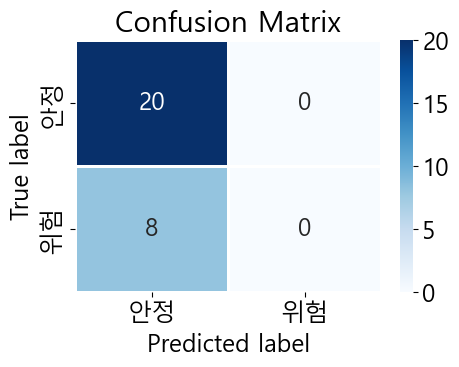

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xc)
class_names = ['안정', '위험']
fig = plt.figure(figsize=(5, 4))
ax = sns.heatmap(cm, annot=True, cmap='Blues', linewidths=1, fmt="d",
                 xticklabels=['안정', '위험'], yticklabels=['안정', '위험'])
ax.set(title='Confusion Matrix', 
        ylabel='True label', 
        xlabel='Predicted label')
plt.tight_layout()

In [35]:
from sklearn.metrics import classification_report

y_pred_xc = best_model_xc.predict(X_test)
print(classification_report(y_test, y_pred_xc, target_names=['안정', '위험']))

              precision    recall  f1-score   support

          안정       0.71      1.00      0.83        20
          위험       0.00      0.00      0.00         8

    accuracy                           0.71        28
   macro avg       0.36      0.50      0.42        28
weighted avg       0.51      0.71      0.60        28



C:\Users\admin\Documents\League\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Documents\League\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Documents\League\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 05. 알고리즘 비교

#### 05-01. 랜덤 포레스트

In [36]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

# K-Fold 교차검증
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# 하이퍼파라미터
parameters_rf = {
    "n_estimators": [10, 50, 100, 150, 200],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# 모델 생성
model_rf = GridSearchCV(RandomForestClassifier(random_state=1), parameters_rf, cv=kfold, verbose=1, n_jobs=-1)

# 모델 학습
model_rf.fit(X_train, y_train)
print(f"Random Forest best 파라미터: {model_rf.best_params_}")

# Random Forest 모델
best_model_rf = model_rf.best_estimator_
best_model_rf.fit(X_train, y_train)

# 모델 예측
y_pred_rf = best_model_rf.predict(X_test)
score_rf = f1_score(y_test, y_pred_rf, average='macro')
print(f"불량탐지 Random Forest f1_score :", score_rf)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Random Forest best 파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
불량탐지 Random Forest f1_score : 0.5130434782608696


In [37]:
# 랜덤 포레스트 모델을 사용하여 예측 수행
y_pred_rf = best_model_rf.predict(X_test)

# 분류 보고서 출력
print(classification_report(y_test, y_pred_rf, target_names=['안정', '위험']))

              precision    recall  f1-score   support

          안정       0.73      0.95      0.83        20
          위험       0.50      0.12      0.20         8

    accuracy                           0.71        28
   macro avg       0.62      0.54      0.51        28
weighted avg       0.66      0.71      0.65        28



#### 05-02 로지스틱 회귀

In [38]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

# K-Fold 교차검증
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# 하이퍼파라미터
parameters_lr = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l2", "none"],
    "solver": ["lbfgs", "newton-cg", "sag", "saga"]
}

# 모델 생성
model_lr = GridSearchCV(LogisticRegression(random_state=1, max_iter=1000), parameters_lr, cv=kfold, verbose=1, n_jobs=-1, error_score='raise')

# 모델 학습
model_lr.fit(X_train, y_train)
print(f"Logistic Regression best 파라미터: {model_lr.best_params_}")

# 로지스틱 회귀 모델
best_model_lr = model_lr.best_estimator_
best_model_lr.fit(X_train, y_train)

# 모델 예측
y_pred_lr = best_model_lr.predict(X_test)
score_lr = f1_score(y_test, y_pred_lr, average='macro')
print(f"불량탐지 Logistic Regression f1_score :", score_lr)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Logistic Regression best 파라미터: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
불량탐지 Logistic Regression f1_score : 0.41666666666666663


#### 05-03. 인공신경망

In [39]:
# 인공신경망: 여러 층의 뉴런으로 구성된 모델로, 복잡한 비선형 문제를 해결할 수 있습니다.
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 샘플 데이터 생성
np.random.seed(1)
X_train = np.random.randn(800, 20)  # 800개의 샘플과 20개의 특성을 가진 훈련 데이터
y_train = np.random.randint(2, size=800)  # 0 또는 1의 값을 가진 훈련 레이블, 불균형한 데이터 분포를 체크할 필요가 있음
X_test = np.random.randn(200, 20)  # 200개의 샘플과 20개의 특성을 가진 테스트 데이터
y_test = np.random.randint(2, size=200)  # 0 또는 1의 값을 가진 테스트 레이블

# 모델 구축
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),  # 64개의 유닛을 가진 Dense 층, 활성화 함수는 ReLU
    layers.Dense(32, activation='relu'),  # 32개의 유닛을 가진 Dense 층, 활성화 함수는 ReLU
    layers.Dense(1, activation='sigmoid')  # 1개의 유닛을 가진 Dense 층, 활성화 함수는 시그모이드, 이진 분류 문제에 적합
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
# Adam 옵티마이저 사용, 학습률은 0.001
# 손실 함수로 이진 교차 엔트로피 사용, 평가 지표로 정확도 사용

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',        # 검증 손실을 모니터링
    patience=15,                # N개 에포크 동안 성능 향상이 없으면 훈련을 중단
    restore_best_weights=True  # 훈련 중단 시 가장 좋은 모델의 가중치를 복원
)

# 모델 훈련
history = model.fit(
    X_train, y_train,
    epochs=100,  # 최대 100 에포크 동안 훈련
    batch_size=8,  # 각 배치의 샘플 수는 8
    validation_split=0.2,  # 20%의 데이터를 검증 데이터로 사용
    callbacks=[early_stopping]  # EarlyStopping 콜백 사용
)

# 모델 예측
y_pred = model.predict(X_test) > 0.5  # 예측된 확률이 0.5보다 큰 경우 1로, 그렇지 않은 경우 0으로 분류
y_pred = y_pred.astype(int)

# F1 스코어 계산
score = f1_score(y_test, y_pred, average='macro')  # F1 스코어 계산, 클래스 불균형을 고려해 macro 평균 사용
print(f"불량탐지 인공 신경망 f1_score: {score}")

# 개선할 수 있는 부분:
# 1. 데이터 분포 확인: y_train과 y_test의 레이블 분포가 고르지 않다면, 모델 학습에 영향을 줄 수 있습니다.
# 2. 데이터 전처리: 입력 데이터의 스케일이 크게 다르다면, 특성 스케일링을 고려할 수 있습니다.
# 3. 모델 구조 및 하이퍼파라미터 튜닝: 모델의 성능을 높이기 위해 모델 구조나 하이퍼파라미터를 튜닝할 수 있습니다.
# 4. 성능 지표 선택: 클래스 불균형이 심각하다면, 정확도 대신 다른 성능 지표를 고려할 수 있습니다.
# 5. 더 복잡한 모델 고려: 문제의 복잡도에 따라 더 복잡한 모델을 고려할 수 있습니다.
# 6. 데이터 양 증가: 더 많은 데이터를 사용하면 모델의 성능이 향상될 수 있습니다.

Epoch 1/100
80/80 [==============================] - 1s 3ms/step - loss: 0.7237 - accuracy: 0.5063 - val_loss: 0.7234 - val_accuracy: 0.4938
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7106 - accuracy: 0.5125 - val_loss: 0.7154 - val_accuracy: 0.5000
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.5203 - val_loss: 0.7105 - val_accuracy: 0.5312
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5109 - val_loss: 0.7076 - val_accuracy: 0.5000
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5203 - val_loss: 0.7064 - val_accuracy: 0.4875
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5219 - val_loss: 0.7048 - val_accuracy: 0.5188
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5391 - val_loss: 0.7040 - val_accuracy: 0.5250
Epoch 8/100
8

In [40]:
# 모델을 사용하여 예측 수행
y_pred_nn = model.predict(X_test) > 0.5
y_pred_nn = y_pred_nn.astype(int)

# 분류 보고서 출력
print(classification_report(y_test, y_pred_nn, target_names=['안정', '위험']))

7/7 [==============================] - 0s 831us/step
              precision    recall  f1-score   support

          안정       0.44      0.35      0.39        97
          위험       0.49      0.58      0.53       103

    accuracy                           0.47       200
   macro avg       0.46      0.47      0.46       200
weighted avg       0.47      0.47      0.46       200

